<a href="https://colab.research.google.com/github/GustGon/I.A.Python/blob/master/neural-network/nn-convulational/T1_Classifica%C3%A7%C3%A3o_binaria_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho #1 - Classificação binária com rede neural deep-learning

Nesse trabalho você vai desenvolver uma rede neural rasa e uma deep-learning, usando a plataforma Keras, para realizar uma tarefa de classificação binária para reconhecer gatos em imagens e comparar o desempenho das duas redes.

## Coloque os nomes e RAs dos alunos que fizeram esse trabalho

Nome e número dos alunos da equipe:

Aluno 1: Gustavo Gonçalves RA: 19.82843-5

Aluno 2: 

## 1 - Bibliotecas ##

Em primeiro ligar, execute a célula abaixo para importar algumas bibliotecas Python que são usadas nesse trabalho. 
- [numpy](www.numpy.org) é a biblioteca básica para computação cinetífica usando Python.
- [h5py](http://www.h5py.org) é uma biblioteca que fornece funções para interagir com banco de dados salvos em arquivos no formato h5.
- [matplotlib](http://matplotlib.org) é uma biblioteca famosa usada para fazer gráficos com Python.
- [PIL](http://www.pythonware.com/products/pil/) e [scipy](https://www.scipy.org/) são usadas para testar a sua RNA com novas imagens no final do trabalho.
- lr_utils é um arquivo com uma função para ler os dados usados nesse trabalho.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

np.random.seed(1) # inicializa gerador de números aleatórios

%matplotlib inline

## 2 - Visão geral do problema ##

**Definição do problema**: 

Nesse trabalho é fornecido um conjunto de dados que contém:

    - um conjunto de imagens de treinamento classificadas como tendo gato (y=1) ou não tendo gato (y=0);
    - um conjunto de imagens de teste classificadas como tendo gato (y=1) ou não tendo gato (y=0);
    - a dimensão de cada imagem é (num_px, num_px, 3), onde 3 é o número de canais de cor (RGB);
    - cada imagem é composta por três matrizes de dimensão: número de linhas = num_px e número de colunas = num_px;
    - número de imagens do conjunto de treinamento: m_train;
    - número de imagens do conjunto de teste: m_test.

A partir desses conjuntos de dados, a sua tarefa é desenvolver um sistema baseado em uma rede neural, para processar imagens e classificar corretamente se ela mostra ou não um gato. Para isso, você vai desenvolver algumas redes neurais usando a ferramenta Keras e comparar o desempenho delas. 

O uso da ferramenta Keras para desenvolver redes neurais facilita muito o trabalho, pois não exige desenvolver codigos específicos para implementar cada camada da rede, a função de custo, a métrica e principalmente o gradiente descendente.

## 3 - Conjunto de dados de treinamento e teste

Para carregar o conjunto de dados execute o código a seguir.

O termo _orig é adicionado no final dos tensores com os dados de treinamento e teste originais porque vamos processar esses dados.

In [0]:
# Carregando os dados (gato/não-gato)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

(64, 64, 3)
[[[  4   6   3]
  [  4   4   2]
  [  5   5   3]
  ...
  [ 52  57  55]
  [ 53  59  56]
  [ 51  55  52]]

 [[  4   5   2]
  [  4   5   1]
  [  6   7   4]
  ...
  [ 54  60  57]
  [ 52  58  54]
  [ 49  54  51]]

 [[  4   5   2]
  [  5   5   2]
  [  6   7   4]
  ...
  [ 53  57  54]
  [ 54  59  55]
  [ 50  55  51]]

 ...

 [[ 18  21  16]
  [ 16  19  15]
  [ 11  15  12]
  ...
  [118 132 142]
  [123 142 151]
  [114 131 139]]

 [[ 16  20  16]
  [ 13  18  14]
  [ 12  16  13]
  ...
  [125 139 147]
  [117 134 143]
  [116 133 142]]

 [[ 13  18  14]
  [ 12  16  12]
  [ 14  19  15]
  ...
  [121 137 145]
  [123 140 147]
  [121 137 146]]]
y = [1], it's a 'cat' picture.


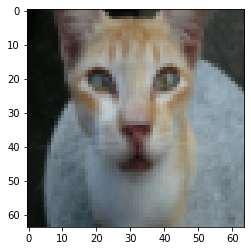

In [0]:
# Examplo de uma imagem
index = 11
print(train_set_x_orig[index].shape)
print(train_set_x_orig[index])
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

No código acima index é o número sequencial da imagem. Tente trocar a imagem, mudando o index, usando valores entre 0 e 208, para visualizar outros exemplos.

### 3.1 - Determinação do formato e dimensões dos dados

### Exercício #1:

É importante conhecer as dimensões dos dados que estamos trabalhando para evitar problemas. Assim, obtenha os valores dos seguintes parâmetros: 
    - m_train = número de exemplos de treinamento;
    - m_test = número de exemplos de teste;
    - num_px = altura e largura das imagens (as imagens são quadradas).
    
Lembre que `train_set_x_orig` é um tensor numpy de dimensão (m_train, num_px, num_px, 3). Por exemplo, você pode obter  `m_train` escrevendo `train_set_x_orig.shape[0]`.

In [0]:
# PARA VOCÊ FAZER:

### COMECE AQUIE ### (≈ 3 linhas)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### TERMINE AQUI ###

print ("Número de exemplos de treinamento: m_train = " + str(m_train))
print ("Número de exemplos de teste: m_test = " + str(m_test))
print ("Altura/largura de cada imagem: num_px = " + str(num_px))
print ("Dimensão de cada imagem: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("Dimensão - train_set_x: " + str(train_set_x_orig.shape))
print ("Dimensão - train_set_y: " + str(train_set_y.shape))
print ("Dimensão - test_set_x: " + str(test_set_x_orig.shape))
print ("Dimensão - test_set_y: " + str(test_set_y.shape))

Número de exemplos de treinamento: m_train = 209
Número de exemplos de teste: m_test = 50
Altura/largura de cada imagem: num_px = 64
Dimensão de cada imagem: (64, 64, 3)
Dimensão - train_set_x: (209, 64, 64, 3)
Dimensão - train_set_y: (1, 209)
Dimensão - test_set_x: (50, 64, 64, 3)
Dimensão - test_set_y: (1, 50)


**Saída esperada para m_train, m_test e num_px**: 
<table style="width:15%">
  <tr>
    <td>m_train</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>

Observe que o primeiro eixo dos tensores com as imagens dos conjuntos de teste e de treinamento representa os exemplos, da forma como é esperado para os dados no Keras.

### 3.2 - Processamento dos dados

Os dados dos exemplos de treinamento e de teste devem ser processados de forma a serem colocados em tensores com as dimensões adequadas e normalizados corretamente. Nos exercícios que seguem você irá realizar o processamento dos dados de forma a poderem ser usados na sua RNA implementada com o Keras.

### Redimensionamento dos dados

Os dados de entrada de uma camada de neurônios densa é um vetor, assim, devemos redimensionar as imagens, que tem dimensão (num_px, num_px, 3), para transformá-las em um vetor linha de dimensão (1, num_px∗num_px∗3). Após esse redimensionamento o conjunto de dados é um tensor numpy onde cada linha representa uma imagem "esticada". O tensor com as entradas dos dados de treinamento terá m_train linhas e o de teste m_test linhas.

Por exemplo, para redimensionar uma matriz de dimensão (a,b,c,d) para uma matriz de dimensão (a, b∗c∗d) pode-se usar o seguinte código Python: 

X_flatten = X.reshape((a, b∗c∗d))

A dimensão dos dados de saída também deve ser alterada porque, como visto, o Keras espara que os exemplos representam o primeiro eixo do tensor e nos dados de saída os exemplos representam o segundo eixo. Assim, os vetores com os dados de saída, tanto de treinamento como de teste, devem ser transpostos.

### Exercício #2:

Implemente o redimensionamento dos dados de entrada na célula a seguir.

In [0]:
# PARA VOCÊ FAZER: redimensionamento das imagens dos exemplos de treinamento e teste

### COMECE AQUI ### (≈ 2 linhas)
# Redimensionamento dos dados de entrada
train_set_x_flatten = train_set_x_orig.reshape((train_set_x_orig.shape[0],
                                                train_set_x_orig.shape[1]*
                                                train_set_x_orig.shape[2]*
                                                train_set_x_orig.shape[3]))
test_set_x_flatten = test_set_x_orig.reshape((test_set_x_orig.shape[0],
                                                test_set_x_orig.shape[1]*
                                                test_set_x_orig.shape[2]*
                                                test_set_x_orig.shape[3]))
### TERMINE AQUI ###

### COMECE AQUI ### (≈ 2 linhas)
# Redimensionamento dos dados de saída (transposição)
train_set_y = np.transpose(train_set_y)
test_set_y = np.transpose(test_set_y)
### TERMINE AQUI ###

print ("Dimensão - train_set_x_flatten: " + str(train_set_x_flatten.shape))
print ("Dimensão - train_set_y: " + str(train_set_y.shape))
print ("Dimensão - test_set_x_flatten: " + str(test_set_x_flatten.shape))
print ("Dimensão - test_set_y: " + str(test_set_y.shape))
print ("Verificação de valores após redimensionamento: " + str(train_set_x_flatten[0,0:5]))

Dimensão - train_set_x_flatten: (209, 12288)
Dimensão - train_set_y: (209, 1)
Dimensão - test_set_x_flatten: (50, 12288)
Dimensão - test_set_y: (50, 1)
Verificação de valores após redimensionamento: [17 31 56 22 33]


**Saída esperada**: 

<table style="width:35%">
  <tr>
    <td>Dimensão train_set_x_flatten</td>
    <td> (209, 12288)</td> 
  </tr>
  <tr>
    <td>Dimensão train_set_y</td>
    <td>(209, 1)</td> 
  </tr>
  <tr>
    <td>Dimensão test_set_x_flatten</td>
    <td>(50, 12288)</td> 
  </tr>
  <tr>
    <td>Dimensão test_set_y</td>
    <td>(50, 1)</td> 
  </tr>
  <tr>
  <td>Verificação de valores após redimensionamento</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

### Normalização dos dados

Nas imagens coloridas as cores vermelho, verde e azul (RGB) são especificadas para cada pixel da imagem, de forma que cada pixel consite de um vetor de tres números que variam no intervalo de 0 a 255.

Uma etapa do processamento dos dados é normalizar esses dados de forma a ter dados com média zero e desvio padrão um. No caso de imagens o processo de normalização dos dados é mais simples e consiste simplesmente em dividir todos os valores da imagem por 255, que é o valor máximo de um pixel.

### Exercício  #3:

Implemente a normalização dos dados de forma a ter todas os elementos dos dados de entrada entre 0 e 1.

In [0]:
# PARA VOCÊ FAZER: redimensionamento das imagens dos exemplos de treinamento e teste

### COMECE AQUI ### (≈ 2 linhas)
train_set_x = train_set_x_orig/255 
test_set_x = test_set_x_orig/255
### TERMINE AQUI ###

print ("Máximo valor de train_set_x: " + str(np.max(train_set_x)))
print ("Máximo valor de test_set_x: " + str(np.max(test_set_x)))

Máximo valor de train_set_x: 1.0
Máximo valor de test_set_x: 1.0


**Saída esperada**: 

<table style="width:35%">
  <tr>
    <td>Máximo valor de train_set_x</td>
    <td> 1.0</td> 
  </tr>
  <tr>
    <td>Máximo valor de test_set_x</td>
    <td> 1.0</td> 
  </tr>
</table>

<font color='blue'>

**O que é importante lembrar:**
    

As etapas principais do processamento de dados são as seguintes:
- Verificar a dimensão e formato dos dados do problema. Nesse caso são: m_train, m_test, num_px, ...
- Redimensionar os conjuntos de dados. Nesse caso para cada exemplo a entrada é um vetor linha de dimensão (1, num_px \* num_px \* 3)
- Normalizar os dados

## 4 - Desenvolvimento e teste da rede neural rasa

Nesse trabalho vamos testar diferentes redes neurais, variando numero de camadas, numero de neurônios nas camadas e tipo de função de ativação para obtermos uma solução que apresente resultados satisfatórios.

Conforme vimos em aula, o desenvolvimento de uma RNA com o Keras é feito segundo as seguintes etapas:

1. Definição dos dados de treinamento e de teste;
2. Configuração da RNA;
3. Compilação da RNA, que também inclui a configuração do processo de treinamento pela escolha da função de custo, do otimizador e da métrica para avaliar o desempenho;
4. Treinamento da RNA;
5. Teste e avaliação do desempenho da RNA.

Observe que a etapa de definição e preparação dos dados já foi realizada.

### 4.1 - Configuração da rede neural ## 

Vamos configurar, treinar e testar uma primeira rede neural simples de uma camada intermediária usando o Keras.

Para essa rede de uma camada, o parâmetro mais importante é o número de neurônios da camada intermediária. Esse número deve ser compatível com o problema que queremos resolver e também com o número de exemplos que temos disponíveis para treinar a rede.

Em linhas gerais cada imagem é representada por 12.288 números e temos 209 imagens de treinamento. Assim, no conjunto de dados de treinamento temos cerca de 2,6 milhões de valores. Existem um princípio em aprendizado supervisionado que diz que o número de parâmetros do sistema deve ser menor do que o número de valores presente no conjunto de dados utilizado para o treinamento. Assim, a sua rede neural deve ter um número de parâmetros menor do que 2,6 milhões. Se a rede possuir mais parâmetros do que o número de valores presentes no conjunto de dados, ela simplesmenet memoriza os dados de treinamento e não funciona direito para nenhum outro caso. Veremos com detalhes esse tipo de problema, mas é importante você estar ciente disso nesse momento.

**Qualquer dúvida que você possa ter de como fazer esse trabalho usando o Keras, ela pode ser sanada olhando as notas da Aula 7 - Ferramentas de Desenvolvmento.**

### Exercício #4:

Usando o Keras configure uma rede neural com as seguintes caracteríticas:

- uma única camada intermediária com 64 neurônios e função de ativação sigmóide;
- como queremos resolver um problema de classificação binária a camada de saída deve possuir um único neurônio e ter função de ativação sigmóide.


In [0]:
# PARA VOCÊ FAZER: configuração de uma RNA rasa

# Importar do Keras classes de modelos e camadas 
from keras.models import Sequential
from keras.layers import Dense, Activation

# Configuração da rede
### COMECE AQUI ### (≈ 3 linhas)
data_shape = (train_set_x_flatten.shape[1],)
rna = Sequential()
rna.add(Dense(units=64, activation='sigmoid', input_shape=data_shape))
rna.add(Dense(units=1, activation='sigmoid'))
### TERMINE AQUI ###

# Visualização da rede
rna.summary()

Using TensorFlow backend.





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 786,561
Trainable params: 786,561
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

Layer (type) Output Shape Param #    

=================================================================

dense_1 (Dense)                  (None, 64)         786496           

dense_2 (Dense)                  (None, 1)              65       

=================================================================

Total params: 786,561

Trainable params: 786,561

Non-trainable params: 0


### 4.2 - Compilação e treinamento da rede neural

A segunda e terceira etapas de desenvolvimento da rede no Keras é a sua compilação e treinamento. 

### Exercício #5:

Compile e treine a sua rede neural usando as seguintes opções:

- Método de otimização: gradiente descendente;
- Função de custo: entropia cruzada;
- Métrica: exatidão;
- No treinamento, utilize no método fit o parâmetro batch_size=209, que é o número de exemplos de treinamento;
- Número de épocas: 10.

Nesse momento estamos treinando a rede somente para verificar se ela é adequada para resolver o problema e se está configurada de forma correta, por isso usamos poucas épocas de treinamento.

In [0]:
# PARA VOCÊ FAZER: configuração do otimizador e treinamento da RNA rasa

# Importar do Keras classe de otimizadores
from keras import optimizers

# Compilação da rede 
### COMECE AQUI ### (≈ 1 ou 2 linhas)
sgd = optimizers.SGD(lr=0.001)
rna.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)
### TERMINE AQUI ###

# Teste de treinamento da rede
### COMECE AQUI ### (≈ 1 linha)
rna.fit(x=train_set_x_flatten, y=train_set_y, epochs=10, batch_size=209)
### TERMINE AQUI ###



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





209/209 [==============================] - 6s 27ms/step - loss: 1.0601 - acc: 0.3445
Epoch 2/10
209/209 [==============================] - 0s 74us/step - loss: 0.7892 - acc: 0.4115
Epoch 3/10
209/209 [==============================] - 0s 40us/step - loss: 0.7041 - acc: 0.5646
Epoch 4/10
209/209 [==============================] - 0s 34us/step - loss: 0.6834 - acc: 0.5742
Epoch 5/10
209/209 [==============================] - 0s 54us/step - loss: 0.6581 - acc: 0.6220
Epoch 6/10
209/209 [==============================] - 0s 60us/step - loss: 0.6412 - acc: 0.6124
Epoch 7/10
209/209 [==============================] - 0s 47us/step - loss: 0.6249 - acc: 0.6603
Epoch 8/10
209/209 [==============================] - 0s 39us/step - loss: 0.6234 - acc: 0.6555
Epoch 9/10
209/209 [==============================] - 0s 48us/step - loss: 0.6223 - acc: 0.6555
Epoch 10/10
209/209 [===========

**Saída esperada:**

Após primeira época:

Epoch 1/10
<td> 209/209 [==============================] - 0s 2ms/step - loss: 0.9456 - acc: 0.3445</td> 

Após a última época:
Epoch 10/10 
<td>209/209 [==============================] - 0s 435us/step - loss: 0.6577 - acc: 0.6411 <td>

Se o seu resultado é esse ou parecido com esse, você pode conluir que a rede está correta e é capaz de aprender os dados de treinamento. Assim, agora você está pronto para treinar a rede de verdade.

### Exercício #6:

Retreine a sua rede usando 5000 épocas. 

Use a opção não imprimir os resultados parciais do treinamento para não gerar tantos dados. No Keras podemos escolher como monitoramos o progresso do treinamento com o parâmetro verbose do método fit, que nos dá as seguintes opções:

- verbose: inteiro = 0, 1, or 2. 
- verbose = 0: silencioso;
- verbose = 1; barra de progresso (padrão);
- verbose = 2; uma linha por época.

Guarde os resultados do treinamento para poder fazer um gráfico do processo de treinamento. Se tiver dúvidas, veja nas notas da Aula 7 como fazer isso.

Não se esqueça de usar no método fit o parâmetro batch_size=209.

Esse treinamento pode levar alguns minutos.

In [0]:
# PARA VOCÊ FAZER: treinamento da RNA por 1000 épocas

### COMECE AQUI ### (≈ 1 linha)
history = rna.fit(x=train_set_x_flatten, y=train_set_y, epochs=5000, batch_size=209)
### TERMINE AQUI ###

Epoch 1/5000
209/209 [==============================] - 0s 53us/step - loss: 0.6185 - acc: 0.6794
Epoch 2/5000
209/209 [==============================] - 0s 43us/step - loss: 0.6194 - acc: 0.6890
Epoch 3/5000
209/209 [==============================] - 0s 40us/step - loss: 0.6188 - acc: 0.6890
Epoch 4/5000
209/209 [==============================] - 0s 50us/step - loss: 0.6078 - acc: 0.6890
Epoch 5/5000
209/209 [==============================] - 0s 47us/step - loss: 0.6150 - acc: 0.6890
Epoch 6/5000
209/209 [==============================] - 0s 46us/step - loss: 0.6159 - acc: 0.6794
Epoch 7/5000
209/209 [==============================] - 0s 53us/step - loss: 0.6183 - acc: 0.6555
Epoch 8/5000
209/209 [==============================] - 0s 59us/step - loss: 0.6181 - acc: 0.6651
Epoch 9/5000
209/209 [==============================] - 0s 75us/step - loss: 0.6145 - acc: 0.6603
Epoch 10/5000
209/209 [==============================] - 0s 75us/step - loss: 0.6145 - acc: 0.6699
Epoch 11/5000
209/2

In [0]:
# Vamos verificar quais variáveis foram salvas no processo de treinamento
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

**Saída esperada:**

dict_keys(['loss', 'acc'])

### 4.3 - Visualização do resultado do treinamento

Para sabermos como o treinamento foi realizado precisamos visualizar a função de custo e a métrica ao longo do processo de treinamento.

### Exercício #7:  ###

Implemente na célula abaixo a visualização dos resultados do treinamento. Observe que os valores da função de custo e da métrico estão no dicionário history com nomes 'loss' e 'acc'. 

Consulte as notas da Aula 7 para relembrar como fazer os gráficos da função de custo e da métrica em função do número de épocas.

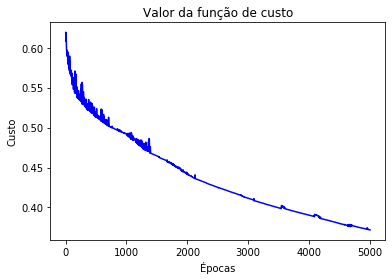

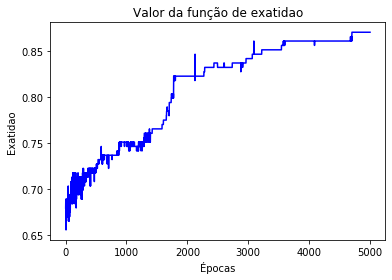

In [0]:
# PARA VOCÊ FAZER: visualização do resultado do treinamento

# Salva custo e exatidão em vetores
### COMECE AQUI ### (≈ 2 linhas)
custo = history_dict['loss']
exatidao = history_dict['acc']
### TERMINE AQUI ###

# Cria vetor de épocas
### COMECE AQUI ### (≈ 1 linha)
epocas = range(1, len(custo) + 1)
### TERMINE AQUI ###

# Gráfico do custo em funçaõ das épocas
### COMECE AQUI ### (≈ 5 linhas)
plt.plot(epocas, custo, 'b') 
plt.title('Valor da função de custo') 
plt.xlabel('Épocas') 
plt.ylabel('Custo') 
plt.show()
### TERMINE AQUI ###

# Gráfico da exatidão em função das épocas
### COMECE AQUI ### (≈ 5 linhas)
plt.plot(epocas, exatidao, 'b') 
plt.title('Valor da função de exatidao') 
plt.xlabel('Épocas') 
plt.ylabel('Exatidao') 
plt.show()
### TERMINE AQUI ###

**Saída esperada:**

O comportamento esperado para a função de custo durante o treinamento é ela decrescer monotomicamente do início até o final. Para a exatidão, o comportamento esperado é ela aumentar durante o treinamento, apresentando algumas oscilações e alcançando um valor alto no final. 

Se você obteve esses resultados, então, a sua rede foi treinada de forma satisfatória e pode-se concluir que ela tem uma capacidade alta para se ajustar aos dados de treinamento.

### 4.4 - Avaliação do desempenho da rede neural ###

Após treinar a RNA é importante avaliar o seu desempenho com dados que não foram  utilizados no treinamento. Para isso usamos o dados de teste, que estão nos tensores test_set_x e test_set_y. 

### Exercício #8: ###

Avalie a sua rede neural calculando os valores da função de custo e da exatidão para os dados de teste usando o método evaluate, conforme visto na Aula 7 - Ferramentas de desenvolvimento. Calcule esses valores também para os dados de treinamento para poder fazer comparação.

In [0]:
# PARA VOCÊ FAZER: calculo do custo e exatidão para os dados de teste

# Usando método evaluate calcule o custo e a exatidão para os dados de treinamento e depois apresente os resultados
### COMECE AQUI ### (≈ 2 linhas)
custo_e_metricas_train = rna.evaluate(train_set_x_flatten, train_set_y)
print(custo_e_metricas_train)
### TERMINE AQUI ###

# Usando método evaluate calcule o custo e a exatidão para os dados de teste e depois apresente os resultados
### COMECE AQUI ### (≈ 2 linhas)
custo_e_metricas_test = rna.evaluate(test_set_x_flatten, test_set_y)
print(custo_e_metricas_test)
### TERMINE AQUI ###

209/209 [==============================] - 0s 227us/step
[0.3718837388394552, 0.8708133971291866]
50/50 [==============================] - 0s 149us/step
[0.6068115615844727, 0.6200000071525573]


**Resultados esperados:**

209/209 [==============================] - 0s 373us/step
<td>[0.350830623692873, 0.9043062203808835]

50/50 [==============================] - 0s 640us/step
<td>[0.605863025188446, 0.6599999976158142]

**Comentários:**

- A exatidação obtida com os dados de treinamento é cerca de 90%, isso significa que a sua rede é satisfatória para resolver esse problema. 

- A exatidão obtida com os dados de teste é de cerca de 66%. Esse resultado de fato não é muito bom para essa tarefa simples de classificação. 

Analisando esses dados surge uma dúvida. Porque a rede não foi capaz de apresentar um bom desempenho nos dados de teste, se os resultados foram bons nos dados de treinamento?

### Exercício #9: ###

Para avaliar melhor o desepenho da sua rede calcule as saídas previstas dos exemplos do conjunto de teste usando o método predict e a função numpy round faça um gráfico com as classes reais e previstas dos dados do conjunto de teste. Se não souber como fazer consulte a Aula 7 - Ferramentas de desenvolvimento.

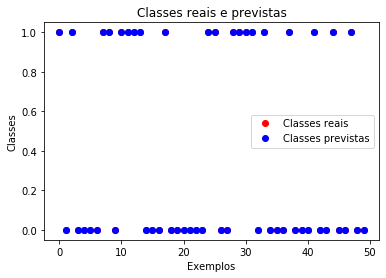

In [0]:
# PARA VOCÊ FAZER: calculo das classes previstas dos dados de teste

# Usando método predict calcule as classes previstas
### COMECE AQUI ### (≈ 2 linhas)
y_prev = rna.predict(test_set_x_flatten) 
yy_prev = np.round(y_prev)
### TERMINE AQUI ###

# Transforma saida prevista em números inteiros
yy_prev = yy_prev.astype(int)

# Gráfico das classes reais e previstas
### COMECE AQUI ### (≈ 7 linhas)
plt.plot(yy_prev, 'ro', label='Classes reais') 
plt.plot(yy_prev, 'bo', label='Classes previstas') 
plt.title('Classes reais e previstas') 
plt.xlabel('Exemplos') 
plt.ylabel('Classes') 
plt.legend() 
plt.show()
## TERMINE AQUI ###

**Saída esperada:**
<img src="classes_previstas_test.png" style="width:400px;height:280px;">

**Comentários:**

- Uma previsão errada de classe pode ser dectada pelos círculos vermelhos, pois quando a classe prevista é igual à classe real o círculo azul é colocado em cima do vermelho tapando-o.

- Provavelmente no grafico devem aparecer mais círculos azuis do que vermelhos indicando que existem mais acertos do que erros na previsão das classes.

Use o código a seguir, mudando a variável 'index', para você visualizar as imagens e a classe prevista dos exemplos de teste.

y = [1], imagem é prevista como sendo uma 'non-cat


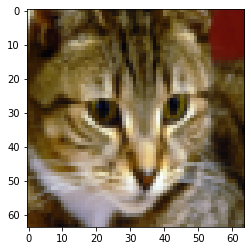

In [0]:
# Exemplo de classificação de uma imagem.
index = 15
plt.imshow(test_set_x[index,:].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[index]) + ", imagem é prevista como sendo uma '" + classes[np.squeeze(yy_prev[index])].decode("utf-8"))

**Interpretação dos resultados:**

O custo decrescendo durante o treinamento mostra que os parâmetros estão sendo ajustados de forma a que a rede está aprendendo os dados de treinamento. Como o custo obtido não é muito baixo, então, provavelmente é possível treinar ainda mais a rede para obter melhores resultados nos dados de treinamento. 

Tente refazer as etapas 4.2, 4.3 e 4.4, aumentando o número de épocas para algo em torno de 5000, para retreinar a rede. Você verá que o custo de treinamento diminui até praticamente zero e a exatidão aumenta para quase 100%. 

**Importante:** só tente treinar a com mais épocas após entregar o seu trabalho, pois os resultados esperados são para o treinamento com 1000 épocas.

Contudo, nem sempre é bom treinar a rede até se obter custo perto de zero e exatidão 100% para os dados de treinamento. Em geral quando isso acontece o custo e a exatidão para os dados de teste pioraram. 

O que ocorre com essa rede é que ela está memorizando os dados de treinamento e não gerneralizando a solução do problema. Veremos daqui algumas aulas como resolver esse problema. Mas podemos verificar esse fato retreinando a rede para um número maior de épocas. 

## 5 - Desenvolvimento e teste da rede neural deep-learning ## 

Nessa etapa do trabalho você vai configurar, treinar e testar uma rede neural deep learning.

**Qualquer dúvida que você possa ter de como fazer essa parte do trabalho, ela pode ser sanada olhando as notas da Aula 7 - Ferramentas de Desenvolvmento.**

### Exercício #10:

Usando o Keras configure e crie uma rede neural com as seguintes caracteríticas:

- três camadas intermediárias com função de ativação tipo ReLu;
- número de neurônios das camadas intermediárias: 64, 32, 16;
- camada de saída deve possuir um único neurônio e ter função de ativação sigmóide.

Essa rede deve ser criada dentro de uma função (build_model) e os argumentos dessa função são: a dimensão dos dados de entrada e os números de neurônios das diversas camadas.

In [0]:
# PARA VOCÊ FAZER: configuração da rede deep-learning

# Importar do Keras modelos e camadas
from keras import models
from keras import layers

def build_model(data_shape,n1,n2,n3,n4):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da terceira camada
    n4 = número de neurônios da camada de saída
        
    Retorna: modelo da rede neural
    """
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈ 4 linhas)
    model.add(layers.Dense(units=n1, activation='relu', input_shape=data_shape))
    model.add(layers.Dense(units=n2, activation='relu'))
    model.add(layers.Dense(units=n3, activation='relu'))
    model.add(layers.Dense(units=n4, activation='sigmoid'))
    ### TERMINE AQUI ###
    
    return model

# Redefine semente para geração de números aleatórios
np.random.seed(3)

# Dimensão dos dados de entrada
data_shape = (12288,)

# Definição dos números de neurônios das camadas
#### COMECE AQUI ### (≈ 4 linhas)
n1 = 64
n2 = 32
n3 = 16
n4 = 1
### TERMINE AQUI ###

# Cria rede neural deep learning
#### COMECE AQUI ### (≈ 1 linhas)
rnadl = build_model(data_shape, n1, n2, n3, n4)
### TERMINE AQUI ###

rnadl.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 789,121
Trainable params: 789,121
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

Layer (type)                 Output Shape              Param #   

=================================================================

dense_3 (Dense)              (None, 64)                786496    

dense_4 (Dense)              (None, 32)                2080      

dense_5 (Dense)              (None, 16)                528       

dense_6 (Dense)              (None, 1)                 17        

=================================================================

Total params: 789,121

Trainable params: 789,121

Non-trainable params: 0


### Exercício #11: ###

Repita os itens 4.2, 4.3 e 4.4 para a rede neural deep-learning. Para isso copie os códigos das células desses itens nas células abaixo, trocando o nome da rede de rna para rnadl e acrescentando as letras dl nas variáveis de custo, exatidao e epocas.

In [0]:
# PARA VOCÊ FAZER: compilação e treinamento da rede deep-learning

# Compilação da rede 
### COMECE AQUI ### (≈ 1 ou 2 linhas)
sgd = optimizers.SGD(lr=0.01)
rnadl.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)
### TERMINE AQUI ###

# Teste de treinamento da rede
### COMECE AQUI ### (≈ 1 linha)
rnadl.fit(x=train_set_x_flatten, y=train_set_y, epochs=10, batch_size=209)
### TERMINE AQUI ###

Epoch 1/10
209/209 [==============================] - 0s 1ms/step - loss: 6.0459 - acc: 0.5742
Epoch 2/10
209/209 [==============================] - 0s 47us/step - loss: 5.5526 - acc: 0.6555
Epoch 3/10
209/209 [==============================] - 0s 39us/step - loss: 5.5526 - acc: 0.6555
Epoch 4/10
209/209 [==============================] - 0s 46us/step - loss: 5.5526 - acc: 0.6555
Epoch 5/10
209/209 [==============================] - 0s 45us/step - loss: 5.5526 - acc: 0.6555
Epoch 6/10
209/209 [==============================] - 0s 45us/step - loss: 5.5526 - acc: 0.6555
Epoch 7/10
209/209 [==============================] - 0s 57us/step - loss: 5.5526 - acc: 0.6555
Epoch 8/10
209/209 [==============================] - 0s 41us/step - loss: 5.5526 - acc: 0.6555
Epoch 9/10
209/209 [==============================] - 0s 40us/step - loss: 5.5526 - acc: 0.6555
Epoch 10/10
209/209 [==============================] - 0s 38us/step - loss: 5.5526 - acc: 0.6555


**Saída esparada:**

Epoch 1/10
<td>209/209 [==============================] - 1s 3ms/step - loss: 0.6694 - acc: 0.5742

Epoch 10/10
<td>209/209 [==============================] - 0s 373us/step - loss: 0.6153 - acc: 0.6555



### Exercício #12: ###

Complete o treinamento da sua RNA usando 1000 épocas. 

In [0]:
# PARA VOCÊ FAZER: treinamento da rede deep-learning por 1000 épocas

### COMECE AQUI ### (≈ 1 linha)
historydl = rnadl.fit(train_set_x_flatten, train_set_y, epochs=1000)
### TERMINE AQUI ###

# Vamos verificar quais variáveis foram salvas no processo de treinamento
historydl_dict = historydl.history
historydl_dict.keys()

Epoch 1/1000
209/209 [==============================] - 0s 215us/step - loss: 5.5526 - acc: 0.6555
Epoch 2/1000
209/209 [==============================] - 0s 186us/step - loss: 5.5526 - acc: 0.6555
Epoch 3/1000
209/209 [==============================] - 0s 196us/step - loss: 5.5526 - acc: 0.6555
Epoch 4/1000
209/209 [==============================] - 0s 197us/step - loss: 5.5526 - acc: 0.6555
Epoch 5/1000
209/209 [==============================] - 0s 213us/step - loss: 5.5526 - acc: 0.6555
Epoch 6/1000
209/209 [==============================] - 0s 213us/step - loss: 5.5526 - acc: 0.6555
Epoch 7/1000
209/209 [==============================] - 0s 188us/step - loss: 5.5526 - acc: 0.6555
Epoch 8/1000
209/209 [==============================] - 0s 185us/step - loss: 5.5526 - acc: 0.6555
Epoch 9/1000
209/209 [==============================] - 0s 187us/step - loss: 5.5526 - acc: 0.6555
Epoch 10/1000
209/209 [==============================] - 0s 184us/step - loss: 5.5526 - acc: 0.6555
Epoch 11/

dict_keys(['loss', 'acc'])

**Saída esperada:**

dict_keys(['loss', 'acc'])

### Exercício #13: ###

Complete as células abaixo para visualizar o resultado do treinamento da RNA e calcular o custo e exatidão para os dados de treinamento e de teste.

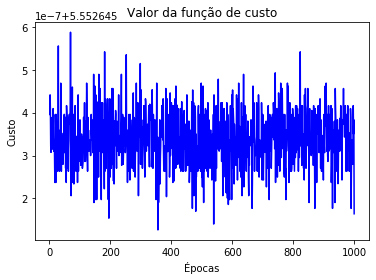

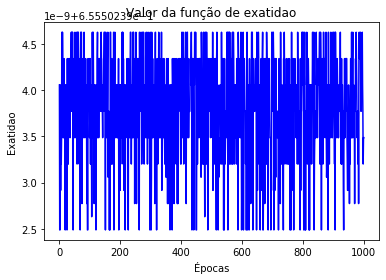

In [0]:
# PARA VOCÊ FAZER: visualização do resultado do treinamento da rede deep-learning

# Salva custo e exatidão em vetores
### COMECE AQUI ### (≈ 2 linhas)
custodl = historydl_dict['loss'] 
exatidaodl = historydl_dict['acc']
### TERMINE AQUI ###

# Cria vetor de épocas
### COMECE AQUI ### (≈ 1 linha)
epocasdl = range(1, len(custodl) + 1)
### TERMINE AQUI ###

# Gráfico do custo em funçaõ das épocas
### COMECE AQUI ### (≈ 5 linhas)
plt.plot(epocasdl, custodl, 'b') 
plt.title('Valor da função de custo') 
plt.xlabel('Épocas') 
plt.ylabel('Custo') 
plt.show()
### TERMINE AQUI ###

# Gráfico da exatidão em função das épocas
### COMECE AQUI ### (≈ 5 linhas)
plt.plot(epocasdl, exatidaodl, 'b') 
plt.title('Valor da função de exatidao') 
plt.xlabel('Épocas') 
plt.ylabel('Exatidao') 
plt.show()
### TERMINE AQUI ###

In [0]:
# PARA VOCÊ FAZER: calculo do custo e exatidão para os dados de treinamento e de teste para a rede deep-learning

# Usando método evaluate calcule o custo e a exatidão dos dados de treinamento e depois apresente os resultados
### COMECE AQUI ### (≈ 2 linhas)
custo_e_metricasdl_train =  rnadl.evaluate(train_set_x_flatten, train_set_y)
print(custo_e_metricasdl_train)
### TERMINE AQUI ###

# Usando método evaluate calcule o custo e a exatidão dos dados de teste e depois apresente os resultados
### COMECE AQUI ### (≈ 2 linhas)
custo_e_metricasdl_test =  rnadl.evaluate(test_set_x_flatten, test_set_y)
print(custo_e_metricasdl_test)
### TERMINE AQUI ###

209/209 [==============================] - 0s 340us/step
[5.552645277178459, 0.6555023932000666]
50/50 [==============================] - 0s 151us/step
[10.637942962646484, 0.34]


**Saída esperada:**

209/209 [==============================] - 0s 622us/step
<td>[0.0120872647087112, 1.0]

50/50 [==============================] - 0s 400us/step
<td>[0.7508826947212219, 0.7800000047683716]

### Exercício #14: ###

Complete a célula abaixo para calcular as classes previstas dos dados de teste para a rede deep-learning.

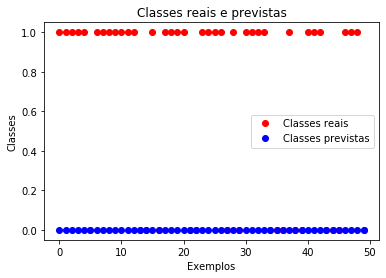

In [0]:
# PARA VOCÊ FAZER: calculo das classes previstas dos dados de teste para a rede deep-learning

# Usando método predict calcule as classes previstas
### COMECE AQUI ### (≈ 2 linhas)
y_prevdl = rnadl.predict(test_set_x_flatten)
yy_prevdl = np.round(y_prevdl)
### TERMINE AQUI ###

# Transforma saida prevista em números inteiros
yy_prevdl = yy_prevdl.astype(int)

# Gráfico das classes reais e previstas
### COMECE AQUI ### (≈ 7 linhas)
plt.plot(test_set_y, 'ro', label='Classes reais') 
plt.plot(yy_prevdl, 'bo', label='Classes previstas') 
plt.title('Classes reais e previstas') 
plt.xlabel('Exemplos') 
plt.ylabel('Classes') 
plt.legend() 
plt.show()
### TERMINE AQUI ###

**Saída esperada:**

O número de erros de classificação é igual a 11 (11 bolinhas vermelhas), que representa 78% dos 50 exemplos de teste.

**Interpretação dos resultados:**

Se você fez tudo correto, então, os resultados obtidos do custo e da exatidão para os dados de teste são melhores para a rede neural deep-learning do que para a rede neural rasa, como era de se esperar.

Observe que a rede deep learning possui quase o mesmo número de parâmetros do que a rede rasa, mas obtém resultados muito mais satisfatórios. 

O que fez com que os resultados da rede deep learning fossem muito melhores do que a rede rasa? O número de camadas, o tipo de função de ativação, ou simplesmenete o número de parâmetros?

<font color='blue'>

**O que é importante lembrar:**
    
- A escolha do número de neurônios das camadas da rede é muito importane;
- O tipo de função de ativação usada pode fazer diferença nos resultados;
- Não é uma tarefa fácil desenvolver uma rede neural que apresenta um desempenho bom, mas não é impossível.

## 6 - Teste as redes que você desenvolveu com sua própria imagem (exercício opcional) ##

Você pode usar qualquer imagem e verificar se as suas redes neurais são eficientes. Para fazer isso faça:
    1. Clique em "File" na parte superior desse notebook e depois clique "Open" para ir para o seu diretório.
    2. Adicione a sua imagem nesse diretório.
    3. Troque o nome do arquivo onde se encontra a imagem no código abaixo.
    4. Execute o código e verifique se a rede acerta (1 = imagem mostra gato, 0 = imagem não tem gato)!

In [0]:
# PARA VOCÊ FAZER: teste da rede com suas imagens

## COMECE AQUI ## (coloque o nome do arquivo com a sua imagem) 
my_image = "dog.jpg" # troque o nome desse arquivo para o arquivo com a sua imagem
## TERMINE AQUI ##

# Pré-processamento da imagem para acertar dimensões.
fname = my_image
image = np.array(plt.imread(fname))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3))

# Previsão da rede neural
y_prev_myimage = rnadl.predict(my_image)
my_predicted_image = np.round(y_prev_myimage)
my_predicted_image = my_predicted_image.astype(int)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", sua rede prevê \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

AttributeError: ignored

Finalmente, como sugestão, tente fazer alterações de parâmetros e executar o notebook novamente. Mas lembre-se de salvar o seu trabalho em um arquivo pdf e enviar para avaliação antes de modificar o notebook e realizar os seus testes.

Algumas sugestões do que alterar:

- Número de camadas;
- Número de neurônios nas camadas;
- Funções de ativação;
- Tente impor um taxa de aprendizado;
- Tente outras formas de normalizar os dados.
